In [ ]:
import numpy as np
import pandas as pd
import os

data_dir = r"C:\Users\HP\OneDrive\Documents\college\6th sem\minor project\archive\KAGGLE\AUDIO"

for dirname, _, filenames in os.walk(data_dir):
    for filename in filenames:
        print(os.path.join(dirname, filename))


C:\Users\HP\OneDrive\Documents\college\6th sem\minor project\archive\KAGGLE\AUDIO\FAKE\biden-to-linus.wav
C:\Users\HP\OneDrive\Documents\college\6th sem\minor project\archive\KAGGLE\AUDIO\FAKE\biden-to-margot.wav
C:\Users\HP\OneDrive\Documents\college\6th sem\minor project\archive\KAGGLE\AUDIO\FAKE\biden-to-musk.wav
C:\Users\HP\OneDrive\Documents\college\6th sem\minor project\archive\KAGGLE\AUDIO\FAKE\biden-to-Obama.wav
C:\Users\HP\OneDrive\Documents\college\6th sem\minor project\archive\KAGGLE\AUDIO\FAKE\biden-to-ryan.wav
C:\Users\HP\OneDrive\Documents\college\6th sem\minor project\archive\KAGGLE\AUDIO\FAKE\biden-to-taylor.wav
C:\Users\HP\OneDrive\Documents\college\6th sem\minor project\archive\KAGGLE\AUDIO\FAKE\biden-to-Trump.wav
C:\Users\HP\OneDrive\Documents\college\6th sem\minor project\archive\KAGGLE\AUDIO\FAKE\linus-to-biden.wav
C:\Users\HP\OneDrive\Documents\college\6th sem\minor project\archive\KAGGLE\AUDIO\FAKE\linus-to-margot.wav
C:\Users\HP\OneDrive\Documents\college\6th se

In [ ]:
%pip install librosa
%pip install pydub

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os
import librosa
from pydub import AudioSegment
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

In [ ]:
dataset_path = r"C:\Users\HP\OneDrive\Documents\college\6th sem\minor project\archive\KAGGLE\AUDIO"
augmented_dataset_path = r"C:\Users\HP\OneDrive\Documents\college\6th sem\minor project\archive\SPLITTED"


In [ ]:
os.makedirs(augmented_dataset_path, exist_ok=True)
os.makedirs(os.path.join(augmented_dataset_path, "FAKE"), exist_ok=True)
os.makedirs(os.path.join(augmented_dataset_path, "REAL"), exist_ok=True)

In [ ]:
def split_audio_file(file_path, output_dir, segment_length=10):
    audio = AudioSegment.from_wav(file_path)
    duration = audio.duration_seconds
    segment_length_ms = segment_length * 1000

    segments = []
    for i in range(0, len(audio), segment_length_ms):
        segment = audio[i:i + segment_length_ms]
        segment_file_name = f"{os.path.splitext(os.path.basename(file_path))[0]}_part{i // segment_length_ms}.wav"
        segment_path = os.path.join(output_dir, segment_file_name)
        segment.export(segment_path, format="wav")
        segments.append(segment_path)
    return segments

In [ ]:
real_samples_path = os.path.join(dataset_path, "REAL")
for file_name in os.listdir(real_samples_path):
    file_path = os.path.join(real_samples_path, file_name)
    output_dir = os.path.join(augmented_dataset_path, "REAL")
    split_audio_file(file_path, output_dir)


In [ ]:
fake_samples_path = os.path.join(dataset_path, "FAKE")
fake_segments = []
for file_name in os.listdir(fake_samples_path):
    file_path = os.path.join(fake_samples_path, file_name)
    output_dir = os.path.join(augmented_dataset_path, "FAKE")
    fake_segments.extend(split_audio_file(file_path, output_dir))

In [ ]:
selected_fake_segments = random.sample(fake_segments, len(os.listdir(r"C:\Users\HP\OneDrive\Documents\college\6th sem\minor project\archive\SPLITTED\REAL")))


In [ ]:

import shutil

selected_fake_path = os.path.join(augmented_dataset_path, "SELECTED_FAKE")
os.makedirs(selected_fake_path, exist_ok=True)

for segment in selected_fake_segments:
    segment_file_name = os.path.basename(segment)
    destination = os.path.join(selected_fake_path, segment_file_name)

    if not os.path.exists(destination):
        os.rename(segment, destination)
    else:
        print(f"File already exists: {destination}, skipping...")


File already exists: C:\Users\HP\OneDrive\Documents\college\6th sem\minor project\archive\SPLITTED\SELECTED_FAKE\biden-to-taylor_part8.wav, skipping...
File already exists: C:\Users\HP\OneDrive\Documents\college\6th sem\minor project\archive\SPLITTED\SELECTED_FAKE\obama-to-musk_part33.wav, skipping...
File already exists: C:\Users\HP\OneDrive\Documents\college\6th sem\minor project\archive\SPLITTED\SELECTED_FAKE\linus-to-musk_part45.wav, skipping...
File already exists: C:\Users\HP\OneDrive\Documents\college\6th sem\minor project\archive\SPLITTED\SELECTED_FAKE\taylor-to-biden_part33.wav, skipping...
File already exists: C:\Users\HP\OneDrive\Documents\college\6th sem\minor project\archive\SPLITTED\SELECTED_FAKE\margot-to-obama_part4.wav, skipping...
File already exists: C:\Users\HP\OneDrive\Documents\college\6th sem\minor project\archive\SPLITTED\SELECTED_FAKE\obama-to-musk_part48.wav, skipping...
File already exists: C:\Users\HP\OneDrive\Documents\college\6th sem\minor project\archive\

In [ ]:
import os
import numpy as np
import librosa
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
def extract_features(file_path, n_mfcc=13):
    y, sr = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    return np.mean(mfccs.T, axis=0)

fake_samples_path = r"C:\Users\HP\OneDrive\Documents\college\6th sem\minor project\archive\SPLITTED\SELECTED_FAKE"
real_samples_path = r"C:\Users\HP\OneDrive\Documents\college\6th sem\minor project\archive\SPLITTED\REAL"


In [ ]:
features = []
labels = []

for file_name in os.listdir(fake_samples_path):
    file_path = os.path.join(fake_samples_path, file_name)
    if file_path.endswith('.wav'):
        features.append(extract_features(file_path))
        labels.append(0)  # Label 0 for fake

for file_name in os.listdir(real_samples_path):
    file_path = os.path.join(real_samples_path, file_name)
    if file_path.endswith('.wav'):
        features.append(extract_features(file_path))
        labels.append(1)  # Label 1 for real

C:\ProgramData\anaconda3\Lib\site-packages\paramiko\pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
C:\ProgramData\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed from this module in 45.0.0.
  "class": algorithms.Blowfish,
C:\ProgramData\anaconda3\Lib\site-packages\paramiko\transport.py:243: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,
C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=144
  warnings.warn(


In [ ]:

X = np.array(features)
y = np.array(labels)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
from sklearn import svm

In [ ]:
svc = svm.SVC()

svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [ ]:

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 0.8054298642533937
Precision: 0.9230769230769231
Recall: 0.47368421052631576
F1-score: 0.6260869565217392


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.98      0.87       145
           1       0.92      0.47      0.63        76

    accuracy                           0.81       221
   macro avg       0.85      0.73      0.75       221
weighted avg       0.83      0.81      0.79       221



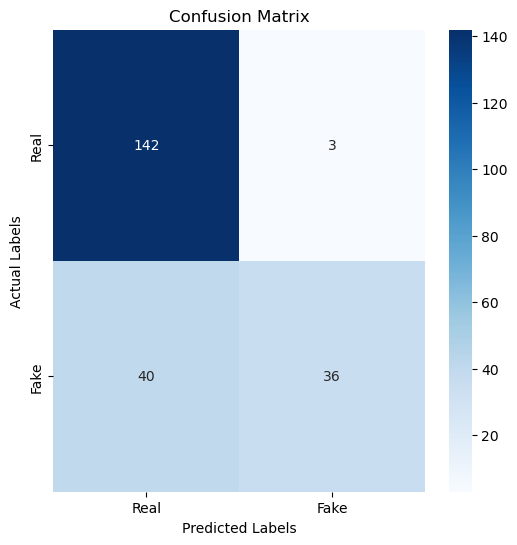

In [ ]:

y_pred_prob = svc.predict(X_test)

# threshold of 0.5 for binary classification
y_pred = np.where(y_pred_prob > 0.5,1,0)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

In [ ]:
lr = LogisticRegressionCV(cv=5, random_state=0, max_iter=500)

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [ ]:

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 0.8416289592760181
Precision: 0.8253968253968254
Recall: 0.6842105263157895
F1-score: 0.7482014388489209


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       145
           1       0.83      0.68      0.75        76

    accuracy                           0.84       221
   macro avg       0.84      0.80      0.82       221
weighted avg       0.84      0.84      0.84       221



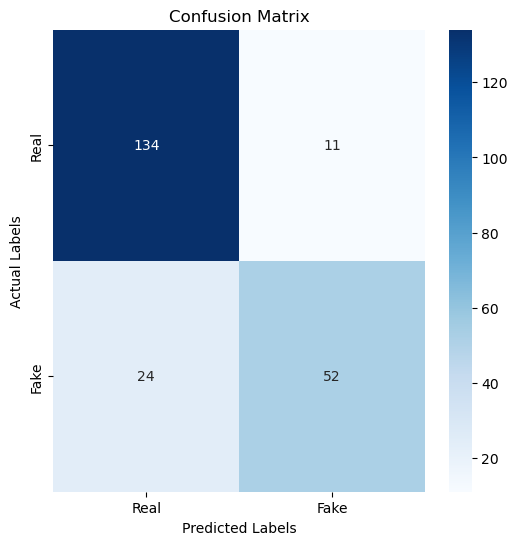

In [ ]:

y_pred_prob = lr.predict(X_test)

y_pred = np.where(y_pred_prob > 0.5,1,0)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [ ]:

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 0.9547511312217195
Precision: 0.9583333333333334
Recall: 0.9078947368421053
F1-score: 0.9324324324324325


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       145
           1       0.96      0.91      0.93        76

    accuracy                           0.95       221
   macro avg       0.96      0.94      0.95       221
weighted avg       0.95      0.95      0.95       221



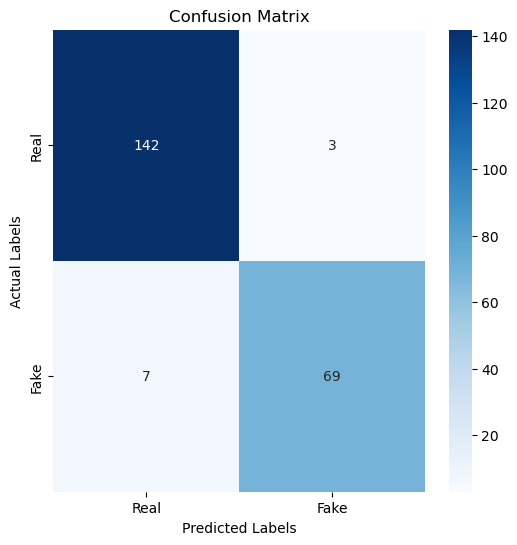

In [ ]:

y_pred_prob = knn.predict(X_test)

y_pred = np.where(y_pred_prob > 0.5,1,0)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

In [ ]:
y_pred_prob = knn.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label=1)

roc_auc = roc_auc_score(y_test, y_pred_prob)
roc_auc

0.9819419237749546

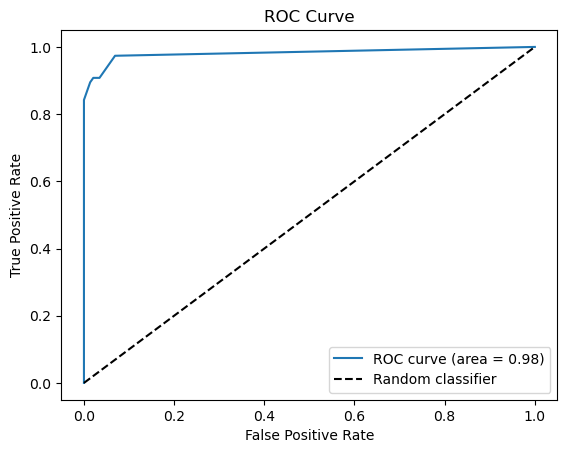

In [ ]:

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import joblib

model_path = r'C:\Users\HP\OneDrive\Documents\college\6th sem\minor project\archive\knn_model.pkl'

joblib.dump(knn, model_path)

['C:\\Users\\HP\\OneDrive\\Documents\\college\\6th sem\\minor project\\archive\\knn_model.pkl']

In [ ]:
import sklearn
print(sklearn.__version__)

1.5.1


In [ ]:

def extract_features(file_path, n_mfcc=13):
    y, sr = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    return np.mean(mfccs.T, axis=0)
new_audio=r'C:\Users\HP\OneDrive\Documents\college\6th sem\minor project\archive\KAGGLE\AUDIO\FAKE/biden-to-linus.wav'
feature=extract_features(new_audio)
print(feature)

[-302.54306    127.27122    -14.283487     1.7166896  -11.172331
   -1.4399917  -16.781767    -4.3161      -4.781767   -10.560547
   -3.4465292    1.9599619  -11.6650715]


In [ ]:
model_path=r'C:\Users\HP\Desktop\Audio Classifier/knn_model.pkl'
load_model=joblib.load(model_path)
feature = np.array(feature).reshape(1, -1)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator KNeighborsClassifier from version 1.6.1 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [ ]:
prediction=load_model.predict(feature)
print("Predicted value:",prediction[0])

Predicted value: 0


In [ ]:
%pip install resampy

  Using cached resampy-0.4.3-py3-none-any.whl.metadata (3.0 kB)
Using cached resampy-0.4.3-py3-none-any.whl (3.1 MB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
!pip install tensorflow

   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/376.0 MB 2.4 MB/s eta 0:02:36
   ---------------------------------------- 1.6/376.0 MB 2.8 MB/s eta 0:02:14
   ---------------------------------------- 2.1/376.0 MB 2.8 MB/s eta 0:02:14
   ---------------------------------------- 3.1/376.0 MB 3.1 MB/s eta 0:02:00
   ---------------------------------------- 3.9/376.0 MB 3.3 MB/s eta 0:01:55
    --------------------------------------- 4.7/376.0 MB 3.4 MB/s eta 0:01:49
    --------------------------------------- 5.8/376.0 MB 3.6 MB/s eta 0:01:43
    --------------------------------------- 6.3/376.0 MB 3.6 MB/s eta 0:01:43
    --------------------------------------- 7.3/376.0 MB 3.6 MB/s eta 0:01:43
    --------------------------------------- 8.4/376.0 MB 3.8 MB/s eta 0:01:38
   - -------------------------------------- 9.7/376.0 MB 3.9 MB/s eta 0:01:34


In [ ]:
import numpy as np
import pandas as pd
import os
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
import IPython
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Reshape,MaxPooling2D, Dropout, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
import os

paths = []
labels = []

# Define the root directory
root_dir = r"C:\Users\HP\OneDrive\Documents\college\6th sem\minor project\archive\KAGGLE\AUDIO"


# Iterate through the subdirectories
for subdir in os.listdir(root_dir):
    subdir_path = os.path.join(root_dir, subdir)
    # Check if it's a directory
    if os.path.isdir(subdir_path):
        # Add all files in the subdirectory
        for filename in os.listdir(subdir_path):
            file_path = os.path.join(subdir_path, filename)
            paths.append(file_path)
            # Add label based on the subdirectory name
            labels.append(subdir)

print('Dataset is loaded')

Dataset is loaded


In [ ]:
len(paths)

64

In [ ]:
paths[:5]

['C:\\Users\\HP\\OneDrive\\Documents\\college\\6th sem\\minor project\\archive\\KAGGLE\\AUDIO\\FAKE\\biden-to-linus.wav',
 'C:\\Users\\HP\\OneDrive\\Documents\\college\\6th sem\\minor project\\archive\\KAGGLE\\AUDIO\\FAKE\\biden-to-margot.wav',
 'C:\\Users\\HP\\OneDrive\\Documents\\college\\6th sem\\minor project\\archive\\KAGGLE\\AUDIO\\FAKE\\biden-to-musk.wav',
 'C:\\Users\\HP\\OneDrive\\Documents\\college\\6th sem\\minor project\\archive\\KAGGLE\\AUDIO\\FAKE\\biden-to-Obama.wav',
 'C:\\Users\\HP\\OneDrive\\Documents\\college\\6th sem\\minor project\\archive\\KAGGLE\\AUDIO\\FAKE\\biden-to-ryan.wav']

In [ ]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels

In [ ]:
df['label'].value_counts()

label
FAKE    56
REAL     8
Name: count, dtype: int64

In [ ]:
audio_path = r"C:\Users\HP\OneDrive\Documents\college\6th sem\minor project\archive\KAGGLE\AUDIO"
real_audio_path = 'REAL'
fake_audio_path = 'FAKE'

In [ ]:
folders = os.listdir(audio_path)
print(folders)

['FAKE', 'REAL']


In [ ]:
real_audio = r"C:\Users\HP\OneDrive\Documents\college\6th sem\minor project\archive\DEMONSTRATION\DEMONSTRATION\linus-original-DEMO.mp3"
fake_audio = r"C:\Users\HP\OneDrive\Documents\college\6th sem\minor project\archive\DEMONSTRATION\DEMONSTRATION\linus-to-musk-DEMO.mp3"


In [ ]:
print('Real Audio:')
IPython.display.Audio(real_audio)

Real Audio:


In [ ]:
print('Fake Audio:')
IPython.display.Audio(fake_audio)

Fake Audio:


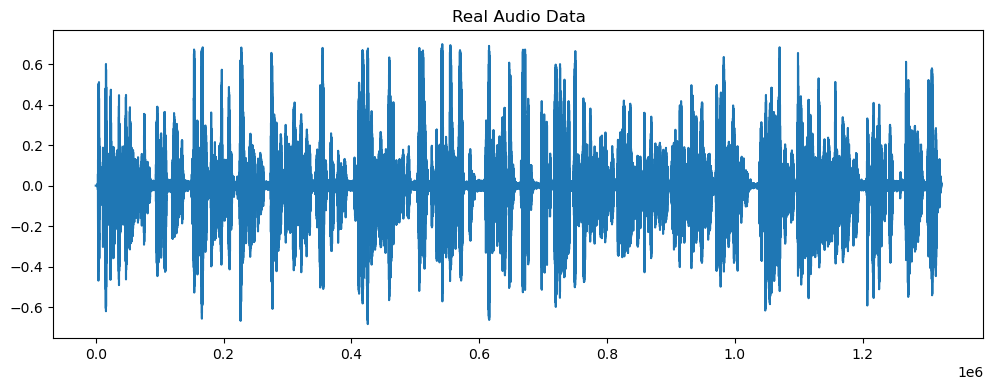

In [ ]:
real_ad, real_sr = librosa.load(real_audio)
plt.figure(figsize= (12,4))
plt.plot(real_ad)
plt.title('Real Audio Data')
plt.show()

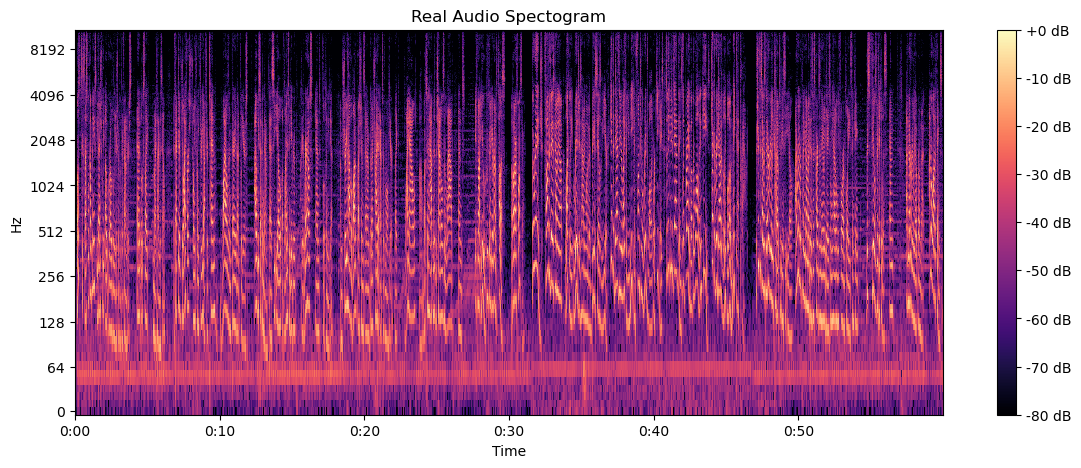

In [ ]:
real_spec = np.abs(librosa.stft(real_ad))
real_spec = librosa.amplitude_to_db(real_spec, ref = np.max)
plt.figure(figsize=(14,5))
librosa.display.specshow(real_spec, sr = real_sr, x_axis = 'time', y_axis = 'log')
plt.colorbar(format = '%+2.0f dB')
plt.title("Real Audio Spectogram")
plt.show()

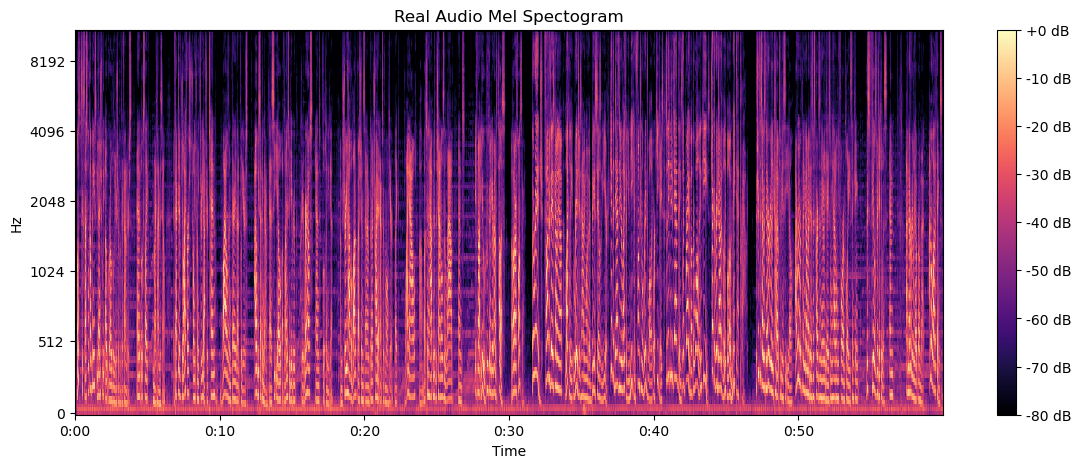

In [ ]:
real_mel_spect = librosa.feature.melspectrogram(y = real_ad, sr = real_sr)
real_mel_spect = librosa.power_to_db(real_mel_spect, ref = np.max)
plt.figure(figsize = (14,5))
librosa.display.specshow(real_mel_spect, y_axis ='mel', x_axis = 'time')
plt.title('Real Audio Mel Spectogram')
plt.colorbar(format = '%+2.0f dB')
plt.show()

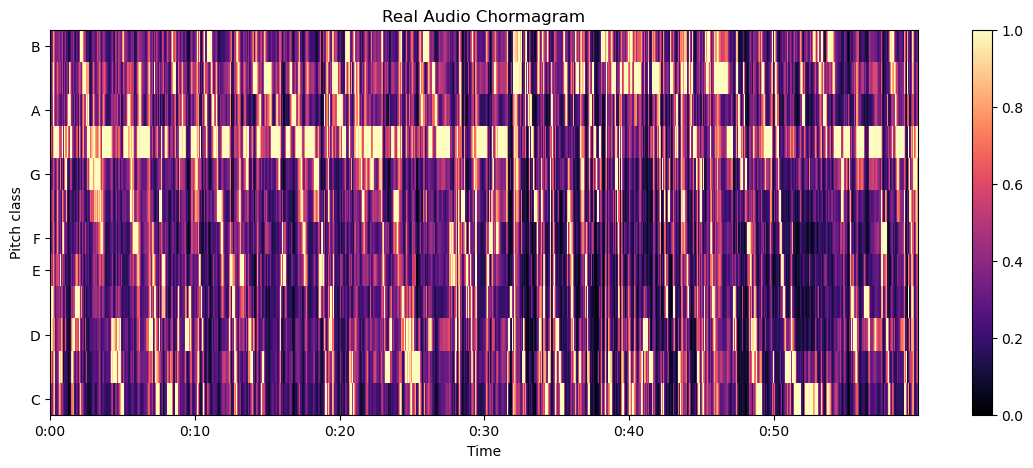

In [ ]:
real_chroma = librosa.feature.chroma_cqt(y = real_ad, sr = real_sr, bins_per_octave=36)
plt.figure(figsize = (14, 5))
librosa.display.specshow(real_chroma, sr = real_sr, x_axis = 'time', y_axis = 'chroma', vmin = 0, vmax = 1)
plt.colorbar()
plt.title('Real Audio Chormagram')
plt.show()

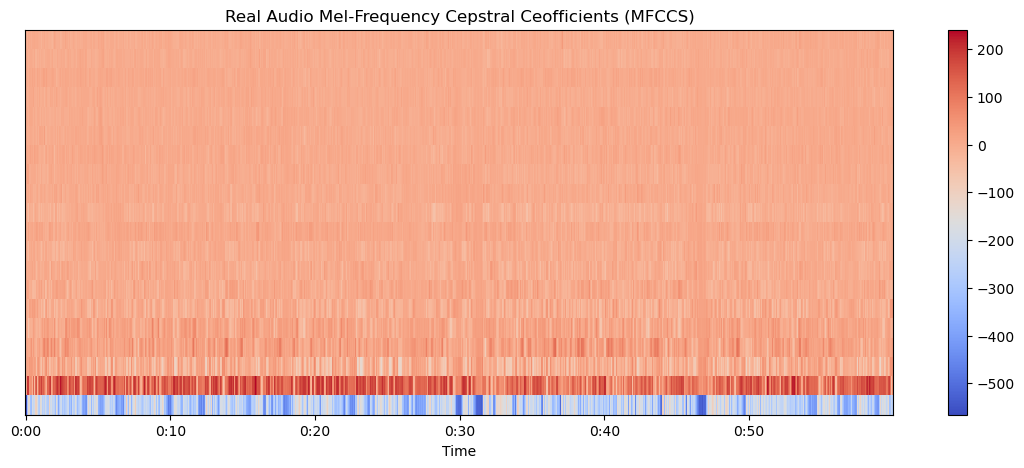

In [ ]:
real_mfcc = librosa.feature.mfcc(y = real_ad, sr = real_sr)
plt.figure(figsize = (14,5))
librosa.display.specshow(real_mfcc, sr = real_sr, x_axis ='time')
plt.colorbar()
plt.title('Real Audio Mel-Frequency Cepstral Ceofficients (MFCCS)')
plt.show()

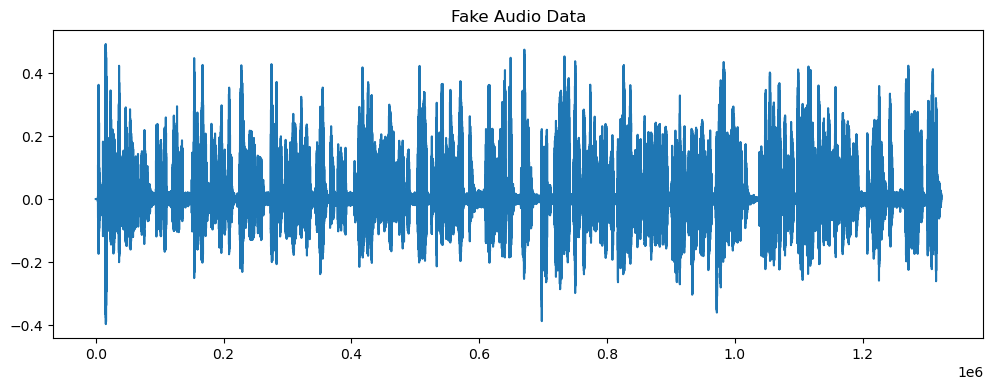

In [ ]:
fake_ad, fake_sr = librosa.load(fake_audio)
plt.figure(figsize =(12,4))
plt.plot(fake_ad)
plt.title("Fake Audio Data")
plt.show()

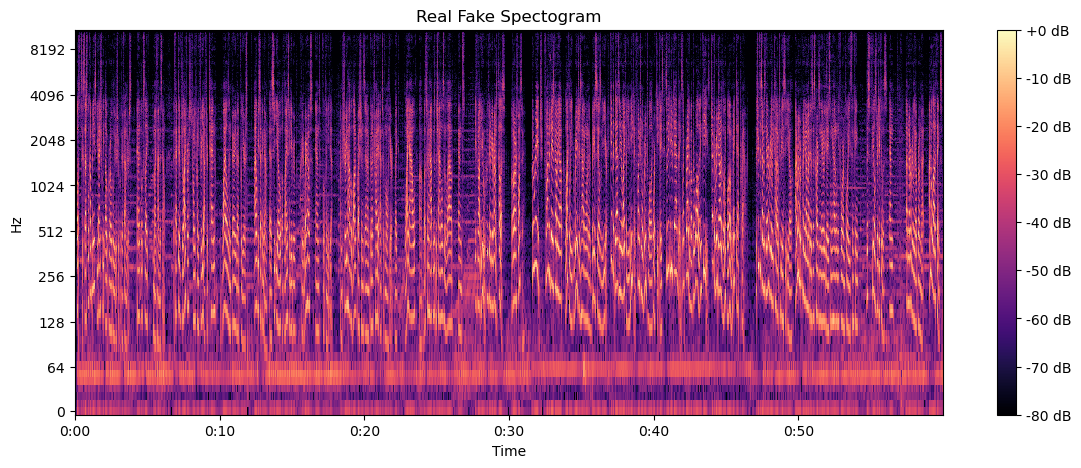

In [ ]:
fake_spec = np.abs(librosa.stft(fake_ad))
fake_spec = librosa.amplitude_to_db(fake_spec, ref = np.max)
plt.figure(figsize=(14,5))
librosa.display.specshow(fake_spec, sr = fake_sr, x_axis = 'time', y_axis = 'log')
plt.colorbar(format = '%+2.0f dB')
plt.title("Real Fake Spectogram")
plt.show()

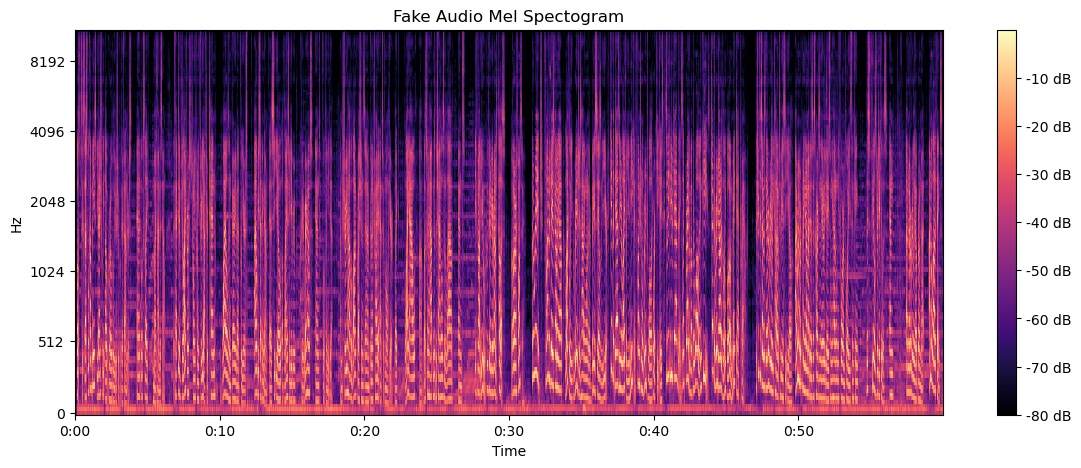

In [ ]:
fake_mel_spect = librosa.feature.melspectrogram(y = fake_ad, sr = fake_sr)
fake_mel_spect = librosa.power_to_db(fake_mel_spect, ref = np.max)
plt.figure(figsize = (14,5))
librosa.display.specshow(fake_mel_spect, y_axis ='mel', x_axis = 'time')
plt.title('Fake Audio Mel Spectogram')
plt.colorbar(format = '%+2.0f dB')
plt.show()

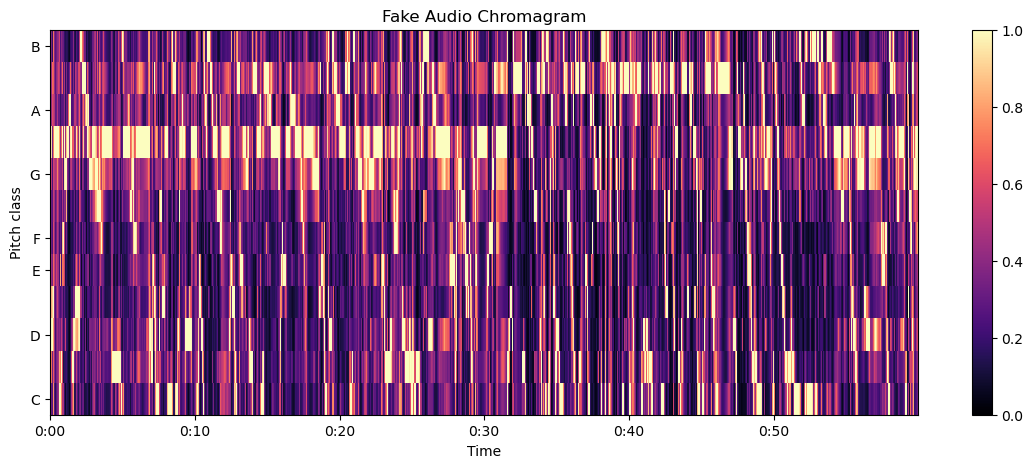

In [ ]:
fake_chroma = librosa.feature.chroma_cqt(y = fake_ad, sr = fake_sr, bins_per_octave=36)
plt.figure(figsize=(14,5))
librosa.display.specshow(fake_chroma, sr = fake_sr, x_axis= 'time', y_axis = 'chroma', vmin = 0, vmax = 1)
plt.colorbar()
plt.title('Fake Audio Chromagram')
plt.show()

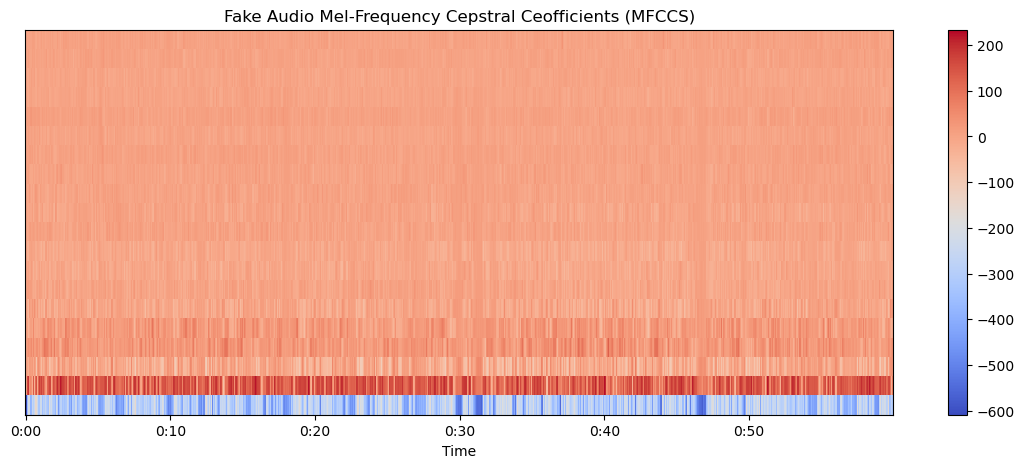

In [ ]:
fake_mfcc = librosa.feature.mfcc(y = fake_ad, sr = fake_sr)
plt.figure(figsize = (14,5))
librosa.display.specshow(fake_mfcc, sr = fake_sr, x_axis ='time')
plt.colorbar()
plt.title('Fake Audio Mel-Frequency Cepstral Ceofficients (MFCCS)')
plt.show()

In [ ]:
import os
os.chdir(r'D:\ML\minor project')
print("Current working directory:", os.getcwd())

Current working directory: D:\ML\minor project


In [ ]:
"""
Audio Deepfake Detection Pipeline
- Handles class imbalance
- Advanced feature extraction
- CSV generation with shuffling
"""

import os
import librosa
import numpy as np
import pandas as pd
from tqdm import tqdm
import warnings
import time

# Configuration
AUDIO_PATH = r"D:\ML\minor project\archive\SPLITTED"
CSV_PATH = r"D:\ML\minor project\archive\audio_features.csv"
SAMPLE_RATE = 22050  # Default for librosa

# Advanced Feature Parameters
N_MFCC = 20
N_MELS = 128
FRAME_LENGTH = 2048
HOP_LENGTH = 512

def extract_advanced_features(file_path):
    """Extract comprehensive audio features"""
    try:
        y, sr = librosa.load(file_path, sr=SAMPLE_RATE)

        # Handle short files
        if len(y) < HOP_LENGTH:
            return None

        features = {}

        # Time-domain features
        features['zcr_mean'] = np.mean(librosa.feature.zero_crossing_rate(y))
        features['rms_energy'] = np.mean(librosa.feature.rms(y=y))

        # Frequency-domain features
        spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
        features['spectral_centroid_mean'] = np.mean(spectral_centroid)
        features['spectral_bandwidth_mean'] = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))

        # Mel features
        mel = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=N_MELS)
        features['mel_mean'] = np.mean(mel)

        # MFCCs with deltas
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=N_MFCC)
        features.update({f'mfcc_{i}_mean': np.mean(mfcc[i]) for i in range(N_MFCC)})

        # Chroma features
        chroma = librosa.feature.chroma_stft(y=y, sr=sr)
        features.update({f'chroma_{i}_mean': np.mean(chroma[i]) for i in range(12)})

        # Spectral contrast
        contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
        features.update({f'contrast_{i}_mean': np.mean(contrast[i]) for i in range(7)})

        return features

    except Exception as e:
        warnings.warn(f"Error processing {file_path}: {str(e)}")
        return None

def process_dataset(base_path):
    """Process all audio files and create dataframe"""
    data = []

    # Process FAKE (label 0)
    fake_path = os.path.join(base_path, "FAKE")
    print("\nProcessing FAKE samples...")
    for file in tqdm(os.listdir(fake_path)):
        file_path = os.path.join(fake_path, file)
        features = extract_advanced_features(file_path)
        if features:
            features['label'] = 0
            data.append(features)

    # Process REAL (label 1)
    real_path = os.path.join(base_path, "REAL")
    print("\nProcessing REAL samples...")
    for file in tqdm(os.listdir(real_path)):
        file_path = os.path.join(real_path, file)
        features = extract_advanced_features(file_path)
        if features:
            features['label'] = 1
            data.append(features)

    return pd.DataFrame(data)

def main():
    start_time = time.time()

    # Create and save dataframe
    df = process_dataset(AUDIO_PATH)

    # Handle class imbalance through random undersampling
    min_samples = min(len(df[df['label'] == 0]), len(df[df['label'] == 1]))
    df_balanced = pd.concat([
        df[df['label'] == 0].sample(min_samples, random_state=42),
        df[df['label'] == 1].sample(min_samples, random_state=42)
    ])

    # Shuffle and save
    df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)
    df_balanced.to_csv(CSV_PATH, index=False)

    print(f"\nProcessing completed in {time.time()-start_time:.2f} seconds")
    print(f"Final dataset shape: {df_balanced.shape}")
    print(f"Class distribution:\n{df_balanced['label'].value_counts()}")

if __name__ == "__main__":
    main()



Processing FAKE samples...


  0%|                                                                                         | 0/2304 [00:00<?, ?it/s]C:\ProgramData\anaconda3\Lib\site-packages\paramiko\pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
C:\ProgramData\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed from this module in 45.0.0.
  "class": algorithms.Blowfish,
C:\ProgramData\anaconda3\Lib\site-packages\paramiko\transport.py:243: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,
100%|█████████████████████████████████████████████████████████████████████████████


Processing REAL samples...


100%|████████████████████████████████████████████████████████████████████████████████| 381/381 [00:55<00:00,  6.85it/s]



Processing completed in 435.48 seconds
Final dataset shape: (760, 45)
Class distribution:
label
1    380
0    380
Name: count, dtype: int64


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   zcr_mean                 760 non-null    float64
 1   rms_energy               760 non-null    float64
 2   spectral_centroid_mean   760 non-null    float64
 3   spectral_bandwidth_mean  760 non-null    float64
 4   mel_mean                 760 non-null    float64
 5   mfcc_0_mean              760 non-null    float64
 6   mfcc_1_mean              760 non-null    float64
 7   mfcc_2_mean              760 non-null    float64
 8   mfcc_3_mean              760 non-null    float64
 9   mfcc_4_mean              760 non-null    float64
 10  mfcc_5_mean              760 non-null    float64
 11  mfcc_6_mean              760 non-null    float64
 12  mfcc_7_mean              760 non-null    float64
 13  mfcc_8_mean              760 non-null    float64
 14  mfcc_9_mea

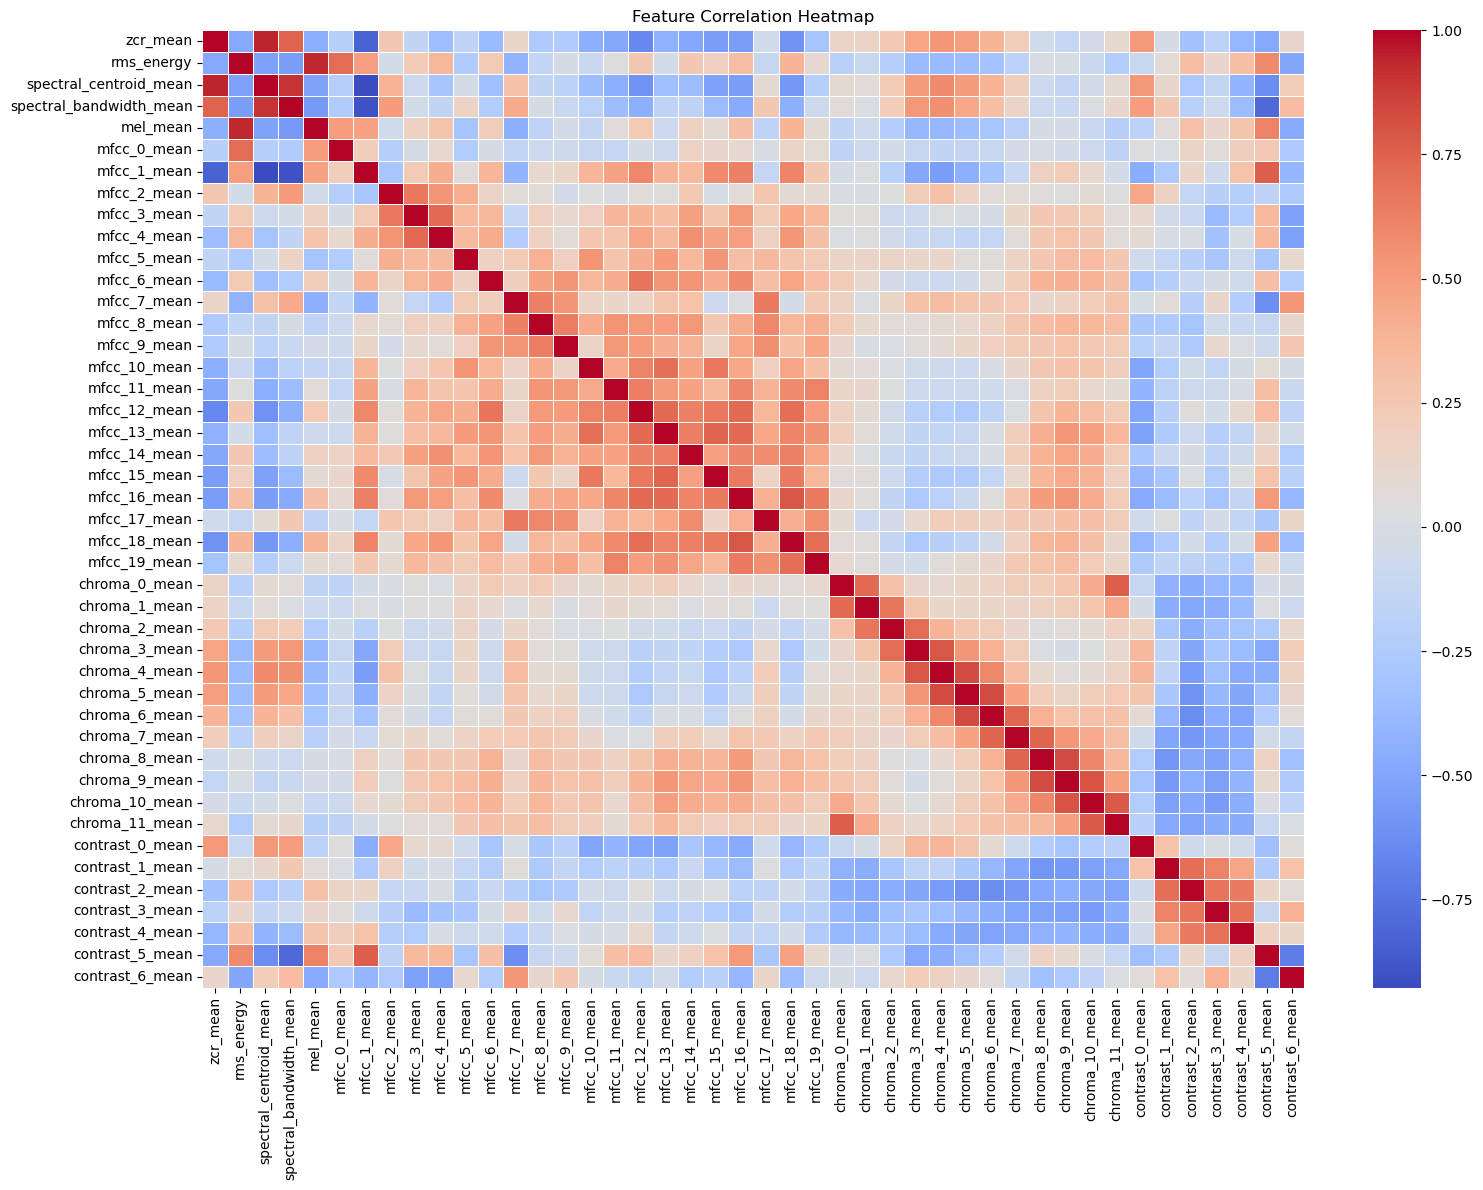

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Path to your CSV file
csv_path = r'D:\ML\minor project\archive\audio_features.csv'

# Load the dataset
df = pd.read_csv(csv_path)

# Show dataframe info and first few rows
print("DataFrame Info:")
df.info()
print("\nFirst 5 rows:")
print(df.head())

# Show shape
print(f"\nShape: {df.shape}")

# Show basic statistics
print("\nDescribe:")
print(df.describe())

# Show class distribution if 'label' column exists
if 'label' in df.columns:
    print("\nClass distribution:")
    print(df['label'].value_counts())

# Correlation heatmap (excluding label)
feature_cols = [col for col in df.columns if col != 'label']
corr = df[feature_cols].corr()

plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()


In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, confusion_matrix,
                            roc_auc_score, roc_curve, precision_recall_curve)
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Configuration
CSV_PATH = r'D:\ML\minor project\archive\audio_features.csv'
MODEL_SAVE_PATH = r'D:\ML\minor project\archive\best_rf_model.pkl'
RANDOM_STATE = 42

# Check if data exists
if not os.path.exists(CSV_PATH):
    raise FileNotFoundError(f"CSV file not found at {CSV_PATH}. Please verify the path.")

# Load and prepare data
df = pd.read_csv(CSV_PATH)
X = df.drop('label', axis=1)
y = df['label']

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=RANDOM_STATE
)

# Optimized parameter grid for 760x45 data
param_grid = {
    'n_estimators': [150, 200, 250],
    'max_depth': [None, 15, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 0.8]
}

# Initialize and train model with class weighting
rf = RandomForestClassifier(
    class_weight='balanced',
    random_state=RANDOM_STATE,
    n_jobs=-1  # Use all cores
)

# Grid search with 5-fold CV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    verbose=1,
    n_jobs=-1
)

print("Starting grid search...")
grid_search.fit(X_train, y_train)

# Best model evaluation
best_rf = grid_search.best_estimator_
print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best CV AUC: {grid_search.best_score_:.4f}")

# Save the best model
joblib.dump(best_rf, MODEL_SAVE_PATH)
print(f"\nModel saved to {MODEL_SAVE_PATH}")

# Generate predictions
y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:, 1]

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['FAKE', 'REAL']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
           xticklabels=['FAKE', 'REAL'],
           yticklabels=['FAKE', 'REAL'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.savefig(os.path.join(os.path.dirname(MODEL_SAVE_PATH), 'confusion_matrix.png'))
plt.close()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig(os.path.join(os.path.dirname(MODEL_SAVE_PATH), 'roc_curve.png'))
plt.close()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_proba)
plt.figure()
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.tight_layout()
plt.savefig(os.path.join(os.path.dirname(MODEL_SAVE_PATH), 'precision_recall_curve.png'))
plt.close()

# Feature Importance
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1][:15]  # Top 15 features

plt.figure(figsize=(12,6))
plt.title("Top 15 Feature Importances")
plt.bar(range(len(indices)), importances[indices], align="center")
plt.xticks(range(len(indices)), X.columns[indices], rotation=45, ha="right")
plt.xlabel("Feature Index")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.savefig(os.path.join(os.path.dirname(MODEL_SAVE_PATH), 'feature_importances.png'))
plt.close()

print("\nEvaluation plots saved to model directory.")


Starting grid search...
Fitting 5 folds for each of 72 candidates, totalling 360 fits

Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 250}
Best CV AUC: 0.9974

Model saved to D:\ML\minor project\archive\best_rf_model.pkl

Classification Report:
              precision    recall  f1-score   support

        FAKE       1.00      0.99      0.99        76
        REAL       0.99      1.00      0.99        76

    accuracy                           0.99       152
   macro avg       0.99      0.99      0.99       152
weighted avg       0.99      0.99      0.99       152


Evaluation plots saved to model directory.


In [ ]:
"""
Optimized XGBoost for Audio Deepfake Detection
"""

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import (classification_report, confusion_matrix,
                            roc_auc_score, roc_curve, precision_recall_curve)
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Configuration
CSV_PATH = r'D:\ML\minor project\archive\audio_features.csv'
MODEL_SAVE_PATH = r'D:\ML\minor project\archive\audio_featuresXGBoost\xgb_best_model.pkl'
RANDOM_STATE = 42

# Load and verify data
df = pd.read_csv(CSV_PATH)
X = df.drop('label', axis=1)
y = df['label']

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=RANDOM_STATE
)

# Optimized parameter grid based on research [1][3][5]
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.9],
    'colsample_bytree': [0.7, 0.9],
    'gamma': [0, 0.1],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [0.5, 1],
    'scale_pos_weight': [1, (len(y_train)-sum(y_train))/sum(y_train)]
}

# Initialize XGBoost with early stopping
xgb = XGBClassifier(objective='binary:logistic',
                   eval_metric='auc',
                   use_label_encoder=False,
                   random_state=RANDOM_STATE)

# Grid search with 5-fold CV
grid_search = GridSearchCV(estimator=xgb,
                          param_grid=param_grid,
                          cv=5,
                          scoring='roc_auc',
                          verbose=1,
                          n_jobs=-1)

print("Starting grid search...")
grid_search.fit(X_train, y_train)

# Best model evaluation
best_xgb = grid_search.best_estimator_
print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best CV AUC: {grid_search.best_score_:.4f}")

# Save model
joblib.dump(best_xgb, MODEL_SAVE_PATH)
print(f"\nModel saved to {MODEL_SAVE_PATH}")

# Generate predictions
y_pred = best_xgb.predict(X_test)
y_proba = best_xgb.predict_proba(X_test)[:, 1]

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['FAKE', 'REAL']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
           xticklabels=['FAKE', 'REAL'],
           yticklabels=['FAKE', 'REAL'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.savefig('confusion_matrix_xgb.png')
plt.close()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig('roc_curve_xgb.png')
plt.close()

# Feature Importance
importances = best_xgb.feature_importances_
indices = np.argsort(importances)[::-1][:15]

plt.figure(figsize=(12,6))
plt.title("Top 15 XGBoost Feature Importances")
plt.bar(range(len(indices)), importances[indices], align="center")
plt.xticks(range(len(indices)), X.columns[indices], rotation=45, ha="right")
plt.xlabel("Feature Index")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.savefig('feature_importances_xgb.png')
plt.close()

print("\nEvaluation plots saved to working directory.")


Starting grid search...
Fitting 5 folds for each of 1728 candidates, totalling 8640 fits


C:\ProgramData\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:32:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Best parameters: {'colsample_bytree': 0.9, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'subsample': 0.7}
Best CV AUC: 0.9976

Model saved to D:\ML\minor project\archive\audio_featuresXGBoost\xgb_best_model.pkl

Classification Report:
              precision    recall  f1-score   support

        FAKE       1.00      0.99      0.99        76
        REAL       0.99      1.00      0.99        76

    accuracy                           0.99       152
   macro avg       0.99      0.99      0.99       152
weighted avg       0.99      0.99      0.99       152


Evaluation plots saved to working directory.


In [ ]:
"""
SVM Classifier for Audio Deepfake Detection
"""

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (classification_report, confusion_matrix,
                            roc_auc_score, roc_curve, precision_recall_curve)
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Configuration
CSV_PATH = r'D:\ML\minor project\archive\audio_features.csv'
MODEL_SAVE_PATH = r'D:\ML\minor project\archive\svm_best_model.pkl'
RANDOM_STATE = 42

# Load and verify data
df = pd.read_csv(CSV_PATH)
X = df.drop('label', axis=1)
y = df['label']

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=RANDOM_STATE
)

# Create pipeline with scaling and SVM
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(probability=True, random_state=RANDOM_STATE))
])

# Optimized parameter grid based on audio classification research
param_grid = {
    'svm__C': [0.1, 1, 10],
    'svm__kernel': ['rbf', 'linear', 'poly'],
    'svm__gamma': ['scale', 'auto', 0.01],
    'svm__class_weight': ['balanced']
}

# Grid search with 5-fold CV
grid_search = GridSearchCV(pipeline, param_grid,
                          cv=5,
                          scoring='roc_auc',
                          verbose=2,
                          n_jobs=-1)

print("Starting grid search...")
grid_search.fit(X_train, y_train)

# Best model evaluation
best_svm = grid_search.best_estimator_
print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best CV AUC: {grid_search.best_score_:.4f}")

# Save model
joblib.dump(best_svm, MODEL_SAVE_PATH)
print(f"\nModel saved to {MODEL_SAVE_PATH}")

# Generate predictions
y_pred = best_svm.predict(X_test)
y_proba = best_svm.predict_proba(X_test)[:, 1]

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['FAKE', 'REAL']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
           xticklabels=['FAKE', 'REAL'],
           yticklabels=['FAKE', 'REAL'])
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.savefig('confusion_matrix_svm.png')
plt.close()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig('roc_curve_svm.png')
plt.close()

# Feature Importance (for linear kernel)
if best_svm.named_steps['svm'].kernel == 'linear':
    coefficients = best_svm.named_steps['svm'].coef_[0]
    indices = np.argsort(np.abs(coefficients))[::-1][:15]

    plt.figure(figsize=(12,6))
    plt.title("Top 15 Feature Coefficients (Linear Kernel)")
    plt.bar(range(len(indices)), coefficients[indices], align="center")
    plt.xticks(range(len(indices)), X.columns[indices], rotation=45, ha="right")
    plt.xlabel("Feature Index")
    plt.ylabel("Coefficient Magnitude")
    plt.tight_layout()
    plt.savefig('feature_coefficients_svm.png')
    plt.close()
else:
    print("\nFeature importance not available for non-linear kernel")

print("\nEvaluation plots saved to working directory.")


Starting grid search...
Fitting 5 folds for each of 27 candidates, totalling 135 fits

Best parameters: {'svm__C': 10, 'svm__class_weight': 'balanced', 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
Best CV AUC: 0.9976

Model saved to D:\ML\minor project\archive\svm_best_model.pkl

Classification Report:
              precision    recall  f1-score   support

        FAKE       0.99      0.96      0.97        76
        REAL       0.96      0.99      0.97        76

    accuracy                           0.97       152
   macro avg       0.97      0.97      0.97       152
weighted avg       0.97      0.97      0.97       152


Feature importance not available for non-linear kernel

Evaluation plots saved to working directory.


In [ ]:
"""
Regularized Logistic Regression for Audio Deepfake Detection
"""

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (classification_report, confusion_matrix,
                            roc_auc_score, roc_curve, precision_recall_curve)
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Configuration
CSV_PATH = r'D:\ML\minor project\archive\audio_features.csv'
MODEL_SAVE_PATH = r'D:\ML\minor project\archive\logreg_best_model.pkl'
RANDOM_STATE = 42

# Load and verify data
df = pd.read_csv(CSV_PATH)
X = df.drop('label', axis=1)
y = df['label']

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=RANDOM_STATE
)

# Create pipeline with scaling and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(random_state=RANDOM_STATE))
])

# Optimized parameter grid for audio classification
param_grid = {
    'logreg__C': np.logspace(-3, 3, 7),  # [0.001, 0.01, ..., 1000]
    'logreg__penalty': ['l1', 'l2'],
    'logreg__solver': ['liblinear', 'saga'],
    'logreg__class_weight': ['balanced']
}

# Grid search with 5-fold CV
grid_search = GridSearchCV(pipeline, param_grid,
                          cv=5,
                          scoring='roc_auc',
                          verbose=1,
                          n_jobs=-1)

print("Starting grid search...")
grid_search.fit(X_train, y_train)

# Best model evaluation
best_logreg = grid_search.best_estimator_
print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best CV AUC: {grid_search.best_score_:.4f}")

# Save model
joblib.dump(best_logreg, MODEL_SAVE_PATH)
print(f"\nModel saved to {MODEL_SAVE_PATH}")

# Generate predictions
y_pred = best_logreg.predict(X_test)
y_proba = best_logreg.predict_proba(X_test)[:, 1]

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['FAKE', 'REAL']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
           xticklabels=['FAKE', 'REAL'],
           yticklabels=['FAKE', 'REAL'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.savefig('confusion_matrix_logreg.png')
plt.close()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig('roc_curve_logreg.png')
plt.close()

# Feature Coefficients
coefficients = best_logreg.named_steps['logreg'].coef_[0]
indices = np.argsort(np.abs(coefficients))[::-1][:15]

plt.figure(figsize=(12,6))
plt.title("Top 15 Feature Coefficients")
plt.bar(range(len(indices)), coefficients[indices], align="center")
plt.xticks(range(len(indices)), X.columns[indices], rotation=45, ha="right")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.tight_layout()
plt.savefig('feature_coefficients_logreg.png')
plt.close()

print("\nEvaluation plots saved to working directory.")


Starting grid search...
Fitting 5 folds for each of 28 candidates, totalling 140 fits

Best parameters: {'logreg__C': 10.0, 'logreg__class_weight': 'balanced', 'logreg__penalty': 'l1', 'logreg__solver': 'liblinear'}
Best CV AUC: 0.9591

Model saved to D:\ML\minor project\archive\logreg_best_model.pkl

Classification Report:
              precision    recall  f1-score   support

        FAKE       0.92      0.92      0.92        76
        REAL       0.92      0.92      0.92        76

    accuracy                           0.92       152
   macro avg       0.92      0.92      0.92       152
weighted avg       0.92      0.92      0.92       152


Evaluation plots saved to working directory.


In [ ]:
"""
MLPClassifier for Audio Deepfake Detection
"""

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (classification_report, confusion_matrix,
                            roc_auc_score, roc_curve, precision_recall_curve)
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Configuration
CSV_PATH = r'D:\ML\minor project\archive\audio_features.csv'
MODEL_SAVE_PATH = r'D:\ML\minor project\archive\mlp_best_model.pkl'
RANDOM_STATE = 42

# Load and verify data
df = pd.read_csv(CSV_PATH)
X = df.drop('label', axis=1)
y = df['label']

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=RANDOM_STATE
)

# Create pipeline with scaling and MLP
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(max_iter=300, random_state=RANDOM_STATE, early_stopping=True))
])

# Optimized parameter grid for audio classification
param_grid = {
    'mlp__hidden_layer_sizes': [(64,), (128,), (64,32), (128,64)],
    'mlp__activation': ['relu', 'tanh'],
    'mlp__alpha': [0.0001, 0.001, 0.01],  # L2 penalty
    'mlp__learning_rate_init': [0.001, 0.01],
    'mlp__solver': ['adam', 'lbfgs']
}

# Grid search with 5-fold CV
grid_search = GridSearchCV(pipeline, param_grid,
                          cv=5,
                          scoring='roc_auc',
                          verbose=2,
                          n_jobs=-1)

print("Starting grid search...")
grid_search.fit(X_train, y_train)

# Best model evaluation
best_mlp = grid_search.best_estimator_
print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best CV AUC: {grid_search.best_score_:.4f}")

# Save model
joblib.dump(best_mlp, MODEL_SAVE_PATH)
print(f"\nModel saved to {MODEL_SAVE_PATH}")

# Generate predictions
y_pred = best_mlp.predict(X_test)
y_proba = best_mlp.predict_proba(X_test)[:, 1]

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['FAKE', 'REAL']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
           xticklabels=['FAKE', 'REAL'],
           yticklabels=['FAKE', 'REAL'])
plt.title('MLP Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.savefig('confusion_matrix_mlp.png')
plt.close()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MLP ROC Curve')
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig('roc_curve_mlp.png')
plt.close()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_proba)
plt.figure()
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('MLP Precision-Recall Curve')
plt.tight_layout()
plt.savefig('precision_recall_curve_mlp.png')
plt.close()

print("\nEvaluation plots saved to working directory.")


Starting grid search...
Fitting 5 folds for each of 96 candidates, totalling 480 fits

Best parameters: {'mlp__activation': 'relu', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (128,), 'mlp__learning_rate_init': 0.01, 'mlp__solver': 'adam'}
Best CV AUC: 0.9933

Model saved to D:\ML\minor project\archive\mlp_best_model.pkl

Classification Report:
              precision    recall  f1-score   support

        FAKE       0.97      0.96      0.97        76
        REAL       0.96      0.97      0.97        76

    accuracy                           0.97       152
   macro avg       0.97      0.97      0.97       152
weighted avg       0.97      0.97      0.97       152


Evaluation plots saved to working directory.
